# GBoosting

### Importing Library

In [46]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

### Importing the Data

In [47]:
# Import data
data = pd.read_csv('data/train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

## Exploring the Data

In [48]:
data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [49]:
data.shape

(47276, 23)

In [50]:
data.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,118671.500613,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,68125.928125,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,59910.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,118660.500000,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,177744.250000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,236377.000000,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


counting duplicates

In [51]:
data.duplicated().sum()

0

In [52]:
data= data.drop("Unnamed: 0",axis=1)

In [53]:
# number of unique values in each column
data.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     74
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                30
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

In [54]:
data.dtypes

Diabetes_012              int64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

<Axes: ylabel='count'>

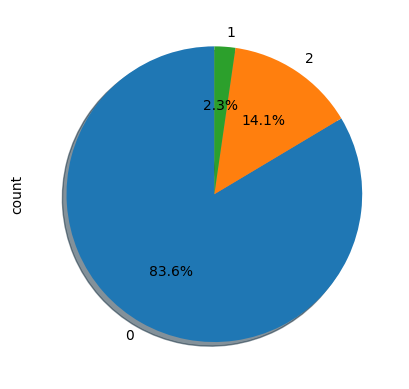

In [55]:
y.value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90)

# Feature enginering

In [56]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X[numerical_columns] = scaler.fit_transform(X)



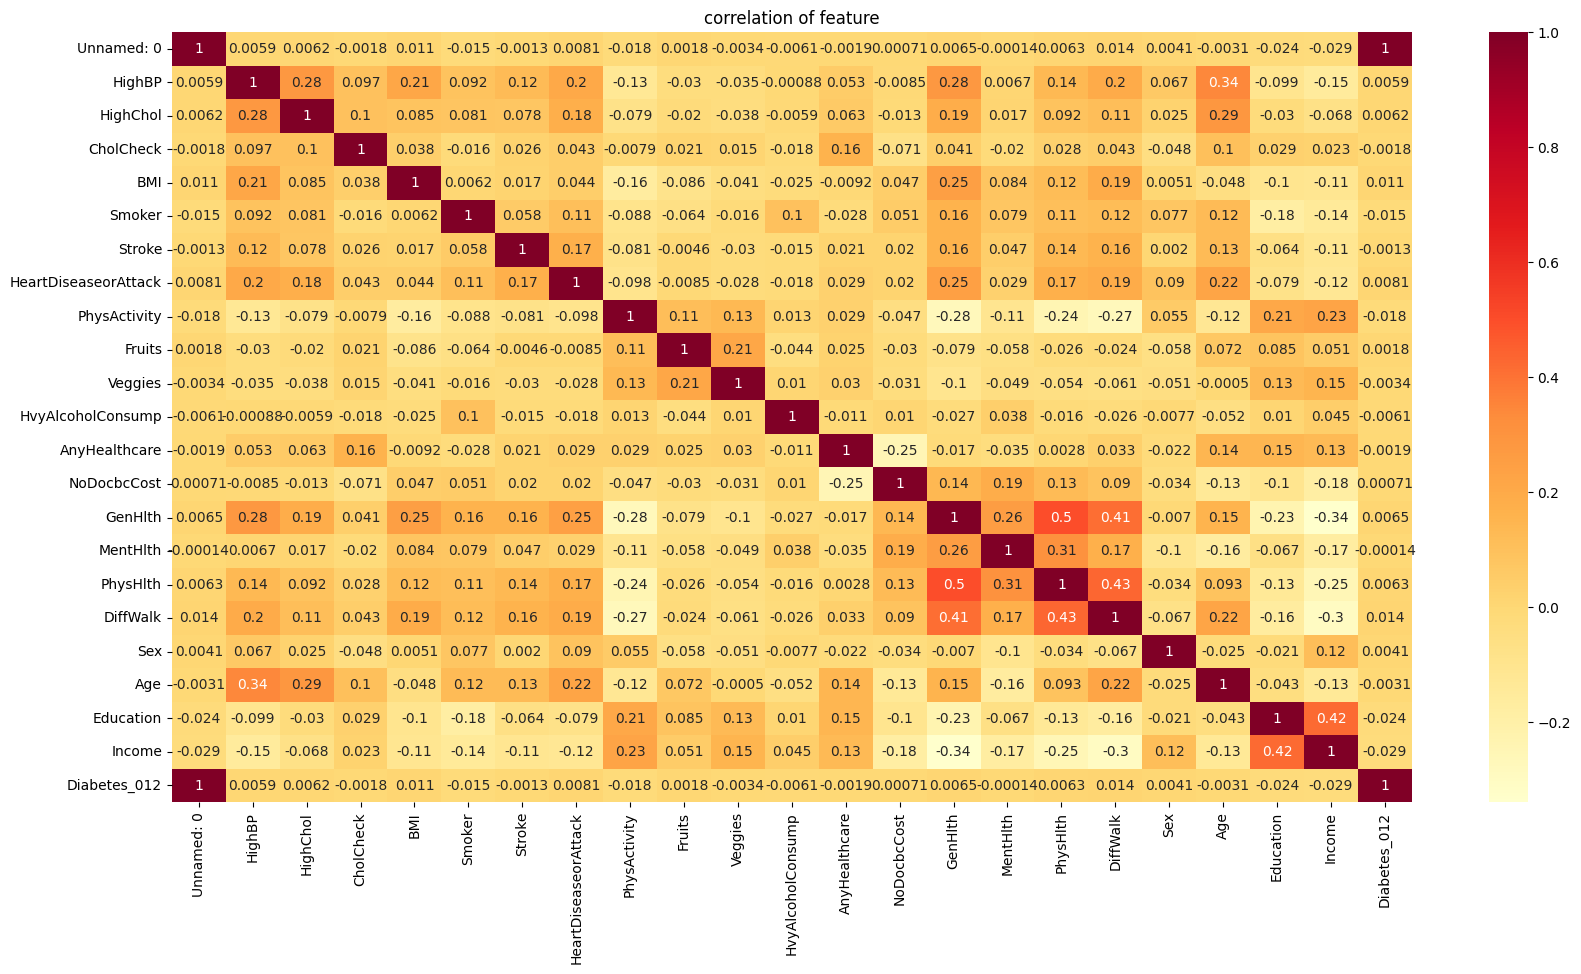

In [57]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

In [58]:
from scipy.stats import pearsonr
pearson_list = []
for l in list(X.columns):
    p,_ = pearsonr(X[l], y)
    pearson_list.append(abs(p))
    
p_value=pd.Series(pearson_list,index=X.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:15]) #we took only 15 features
print(high_score_features_pearson)

X=X[high_score_features_pearson]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'PhysActivity', 'Education', 'Stroke', 'CholCheck', 'HvyAlcoholConsump', 'Smoker']


## Over Sampling

In [59]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_over_sampled, y_over_sampled = smote.fit_resample(X_train, y_train)
print(X_over_sampled.shape)

(94827, 15)


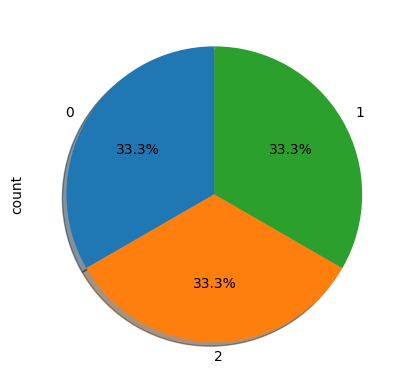

In [60]:
y_over_sampled.value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90);


In [61]:
# Initialize the model
#---- à modifier en utilisant l'un des trois modeles : SVM, RandomForest et GradientBoosting ----
from  sklearn.ensemble import GradientBoostingClassifier
# Example with Gradient Boosting Classifier
clf = GradientBoostingClassifier()


# Train the model
clf.fit(X_over_sampled, y_over_sampled)
X_over_sampled.shape

In [ ]:
# Predict on test data
pred_over = clf.predict(X_test)

## UNDER sampling

In [ ]:

import imblearn
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_under_sampled, y_under_sampled = undersampler.fit_resample(X_train, y_train)

In [ ]:

# Example with Gradient Boosting Classifier
clf_under = GradientBoostingClassifier()


# Train the model
clf_under.fit(X_under_sampled, y_under_sampled)

pred_under = clf.predict(X_test)

/home/rami/Desktop/Project-Container/Project-Container/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,pred_under)}')
print(f'Classification_report:\n {classification_report(y_test,pred_over)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      7899
           1       0.06      0.01      0.02       220
           2       0.39      0.52      0.45      1337

    accuracy                           0.80      9456
   macro avg       0.45      0.47      0.45      9456
weighted avg       0.81      0.80      0.80      9456

Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      7899
           1       0.06      0.01      0.02       220
           2       0.39      0.52      0.45      1337

    accuracy                           0.80      9456
   macro avg       0.45      0.47      0.45      9456
weighted avg       0.81      0.80      0.80      9456



## Grid Search

In [ ]:
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.datasets import make_classification
#from sklearn.metrics import classification_report
#
#
#clf= GradientBoostingClassifier()
#
#param_grid = {
#    'n_estimators': [20, 50, 100],
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 4, 5],
#}
#
#grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=2)
#
#grid_search.fit(X_over_sampled, y_over_sampled)
#
#print("Best Hyperparameters:", grid_search.best_params_)
#
#best_gb_model = grid_search.best_estimator_
#
#y_pred = best_gb_model.predict(X_test)
#
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=20; total time=   9.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=20; total time=  10.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=20; total time=  10.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=20; total time=  10.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=20; total time=  11.8s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=20; total time=  14.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  26.0s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=20; total time=  14.8s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  26.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  26.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  26.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_

In [ ]:
# Export model
print(f'Classification_report:\n {classification_report(y_test,y_pred)}')

pickle.dump(clf, open("GBOOST.pkl", "wb"))
X_train

Classification_report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      7899
           1       0.00      0.00      0.00       220
           2       0.45      0.24      0.32      1337

    accuracy                           0.83      9456
   macro avg       0.44      0.40      0.41      9456
weighted avg       0.78      0.83      0.80      9456



,GenHlth,HighBP,BMI,DiffWalk,HighChol,Age,HeartDiseaseorAttack,PhysHlth,Income,PhysActivity,Education,Stroke,CholCheck,HvyAlcoholConsump,Smoker
21332,-1.434811,1.176769,-0.295475,2.355403,1.219708,0.654389,-0.306259,-0.456484,0.449655,0.529097,0.906529,-0.199467,0.192307,3.893226,-0.830370
18106,-0.461107,1.176769,-0.600233,-0.424556,1.219708,0.964207,-0.306259,-0.456484,0.449655,0.529097,-0.150626,-0.199467,0.192307,-0.256856,-0.830370
30664,1.486301,1.176769,-0.295475,2.355403,1.219708,0.964207,3.265206,1.242681,-0.812465,0.529097,-1.207781,5.013360,0.192307,-0.256856,1.204282
26704,-0.461107,-0.849784,-0.143096,-0.424556,1.219708,0.344571,-0.306259,-0.456484,-0.391758,-1.890012,-2.264936,-0.199467,0.192307,-0.256856,1.204282
21739,0.512597,-0.849784,0.161662,-0.424556,1.219708,0.344571,-0.306259,-0.456484,1.291068,0.529097,0.906529,-0.199467,0.192307,-0.256856,-0.830370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.461107,-0.849784,-0.295475,-0.424556,1.219708,0.654389,-0.306259,-0.456484,0.449655,0.529097,-1.207781,-0.199467,0.192307,-0.256856,1.204282
44732,1.486301,-0.849784,-0.752611,2.355403,-0.819869,1.274024,-0.306259,3.184584,0.449655,0.529097,0.906529,-0.199467,0.192307,-0.256856,1.204282
38158,0.512597,-0.849784,-0.904990,-0.424556,-0.819869,-0.584883,-0.306259,-0.456484,0.028948,0.529097,0.906529,-0.199467,0.192307,-0.256856,-0.830370
860,-1.434811,-0.849784,1.533071,2.355403,-0.819869,-0.275065,-0.306259,-0.456484,-2.495291,0.529097,-1.207781,-0.199467,0.192307,-0.256856,1.204282
